# Lab 5: Feature Selection 

This notebook builds on top of Lab 4 by introducing feature selection into the process of selecting the best classifier for a binary classification problem.

The feature selection method applied here is Recursive Feature Elimination (RFE) as demonstrated in the tutorial at https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/.

In this demonstration we use a modified version of the seeds data set (see https://archive.ics.uci.edu/ml/datasets/seeds), which is the same data set used in Lab 4.

## A. Preparation

### Import Python modules

In [157]:
import pandas as pd
import numpy as np

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

### Load and prepare the dataset for training and evaluation
Feel free to apply any other pre-processing technique at this point.

In [2]:
lab5_df = pd.read_csv("./seeds_dataset_binary.csv")
lab5_df.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,0.333333
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.472531
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,0.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,1.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,1.000000


In [3]:
# target attribute
target_attribute_name = 'type'
target = lab5_df[target_attribute_name]

# predictor attributes
predictors = lab5_df.drop(target_attribute_name, axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

Split the data set into a training (80%) and test (20%) data sets.

In [4]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

## B. Feature Selection

#### 1. Apply RFE with SVM for selecting the best features

In [5]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, 3)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False False False  True False  True  True]
[5 2 3 1 4 1 1]


#### 2. Apply RFE with Logistic Regression for selecting the best features

In [6]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression()
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, 3)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False False  True False False  True  True]
[3 4 1 5 2 1 1]


## B. Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

__Note:__ The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors. 

In [7]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [8]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [9]:
classifier = svm.SVC()

In [10]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

0.9285714285714286

In [11]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.9047619047619048

In [12]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.9047619047619048

## C. Conclusion

The results above, give evidence that model1 is most accurate.

However, when you execute this code again, it is very likely to get different results.

To get more accurate results, accounting for the variance in the results, it is better to run the whole experiment multiple times and measure the variance in the results. Then pick the model that gives better results.

# Task 1

In [60]:
t1_df = pd.read_csv("./winequality_red.csv")
t1_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [61]:
print("Number of Samples  in Dataset:\t",t1_df.shape[0])
print("Number of Features in Dataset:\t",t1_df.shape[1])

Number of Samples  in Dataset:	 1599
Number of Features in Dataset:	 12


In [64]:
# target attribute
target_attribute_name = 'quality'
target = t1_df[target_attribute_name]

print("\n****\t",'quality',"\t****")
print("Total Values = \t",t1_df['quality'].count(),"\n")
print(t1_df['quality'].value_counts(dropna=False))
print("****************************")


****	 quality 	****
Total Values = 	 1599 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
****************************


In [65]:
# predictor attributes
predictors = t1_df.drop(target_attribute_name, axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

Split the data set into a training (80%) and test (20%) data sets.

In [66]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

## B. Feature Selection

In [109]:
# Add variable to allow the number of features selected to be varied
num_features = 3

#### 1. Apply RFE with SVM for selecting the best features

In [110]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, num_features)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False  True False False False False False False False  True  True]
[4 1 9 3 2 8 6 5 7 1 1]


In [111]:
# Print Attributes that were selected/dropped
print("The following features were selected:")
for i in range(len(selectorSVM.support_)):
    if(selectorSVM.support_[i]==True):
        print("\t",t1_df.columns[i])

print("The following features were NOT selected:")
for i in range(len(selectorSVM.support_)):
    if(selectorSVM.support_[i]==False):
        print("\t",t1_df.columns[i])

The following features were selected:
	 volatile acidity
	 sulphates
	 alcohol
The following features were NOT selected:
	 fixed acidity
	 citric acid
	 residual sugar
	 chlorides
	 free sulfur dioxide
	 total sulfur dioxide
	 density
	 pH


In [112]:
def print_feature_selection(support, ranking, df):
    # Print Attributes that were selected/dropped
    print("The following features were selected (ranking):")
    for i in range(len(support)):
        if(support[i]==True):
            print("\t",df.columns[i], "(",ranking[i],")")

    print("The following features were NOT selected  (ranking):")
    for i in range(len(support)):
        if(support[i]==False):
            print("\t",df.columns[i], "(",ranking[i],")")
            
    return

#### 2. Apply RFE with Logistic Regression for selecting the best features

In [113]:
# create a base classifier used to evaluate a subset of attributes
#estimatorLR = LogisticRegression()
estimatorLR = LogisticRegression(solver='lbfgs', multi_class='auto')
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, num_features)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False  True False False False False False False False  True  True]
[6 1 3 5 7 8 2 4 9 1 1]


In [114]:
print_feature_selection(selectorLR.support_, selectorLR.ranking_, t1_df)

The following features were selected (ranking):
	 volatile acidity ( 1 )
	 sulphates ( 1 )
	 alcohol ( 1 )
The following features were NOT selected  (ranking):
	 fixed acidity ( 6 )
	 citric acid ( 3 )
	 residual sugar ( 5 )
	 chlorides ( 7 )
	 free sulfur dioxide ( 8 )
	 total sulfur dioxide ( 2 )
	 density ( 4 )
	 pH ( 9 )


## B. Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

__Note:__ The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors. 

In [115]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [116]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [117]:
classifier = svm.SVC()

In [118]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5575

In [119]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5575

In [120]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5675

In [121]:
model3.predict(predictors_test)

array([5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5,
       6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5,
       5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5,

In [122]:
type(target_test)

pandas.core.series.Series

In [123]:
target_test.values

array([6, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 5, 7, 6, 6, 5, 4, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 8, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 5, 5, 8, 6, 5, 5, 7, 6, 6, 5, 4, 5, 7, 5, 6,
       7, 6, 6, 4, 8, 7, 5, 6, 5, 6, 6, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 7,
       7, 6, 5, 5, 6, 6, 7, 6, 6, 7, 5, 6, 6, 6, 7, 6, 5, 6, 7, 5, 4, 6,
       6, 6, 6, 5, 5, 6, 6, 5, 4, 7, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6,
       7, 6, 5, 5, 6, 5, 6, 5, 5, 7, 5, 3, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5,
       7, 7, 5, 5, 5, 8, 5, 7, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 6, 4, 6, 5,
       5, 6, 5, 5, 5, 6, 7, 6, 6, 6, 5, 6, 3, 5, 5, 7, 5, 5, 6, 5, 7, 5,
       8, 5, 6, 7, 5, 6, 5, 5, 6, 7, 6, 5, 5, 6, 5, 5, 6, 7, 7, 6, 6, 6,
       5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 6, 5, 5, 5, 7,
       6, 5, 5, 4, 5, 6, 5, 6, 5, 7, 5, 5, 6, 5, 5, 5, 6, 6, 5, 7, 5, 6,
       6, 7, 6, 6, 5, 6, 5, 4, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 7, 5, 7, 6, 5, 6, 6, 6, 6,

In [125]:
predictors_test_LRselected.shape

(800, 3)

# Task 2

In [185]:
# Test Split Sizes
splits = np.arange(0.1,0.6,0.05)
print(splits)

# Number of Features to be selected
nfeatures = np.arange(1,12,1)
print(nfeatures)

[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55]
[ 1  2  3  4  5  6  7  8  9 10 11]


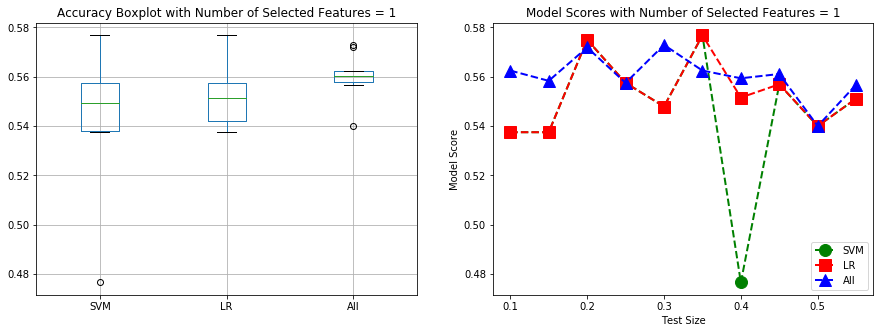

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


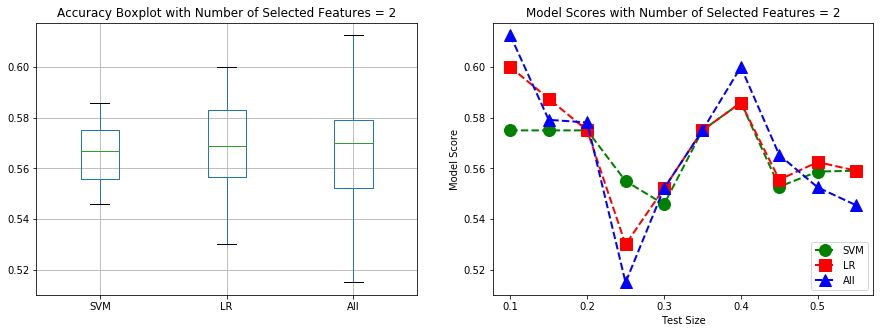

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


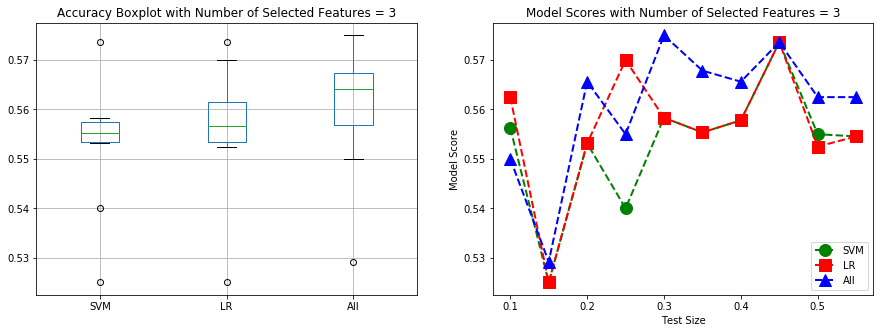

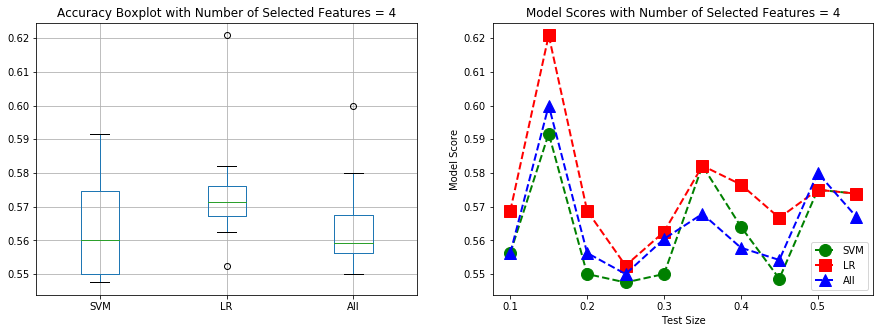

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


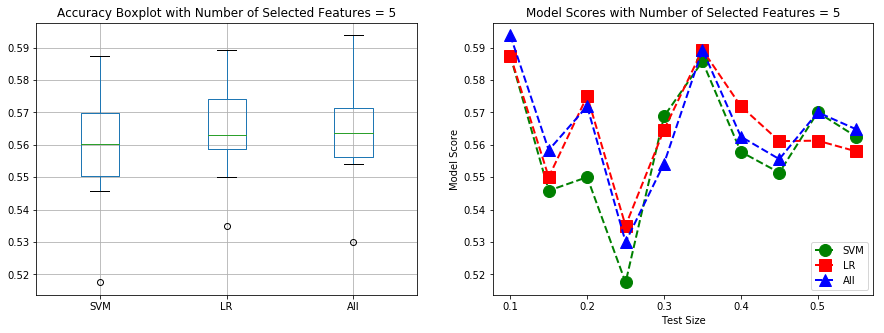

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


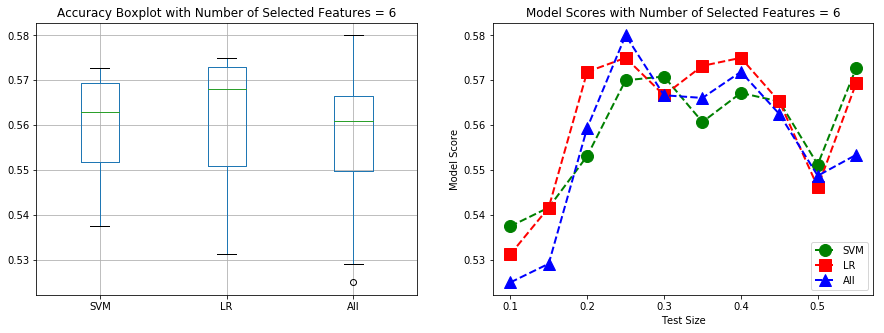

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


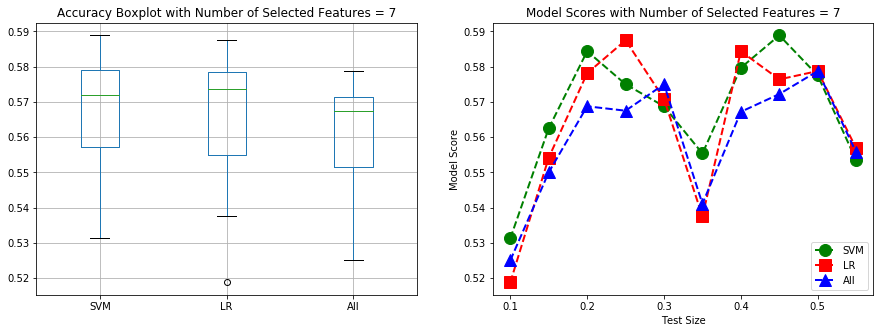

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


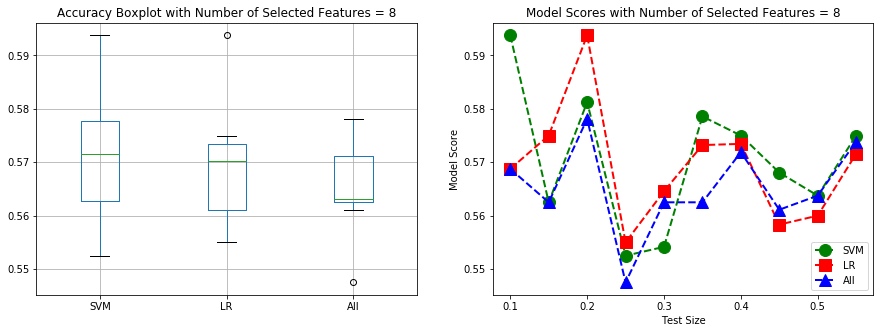

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


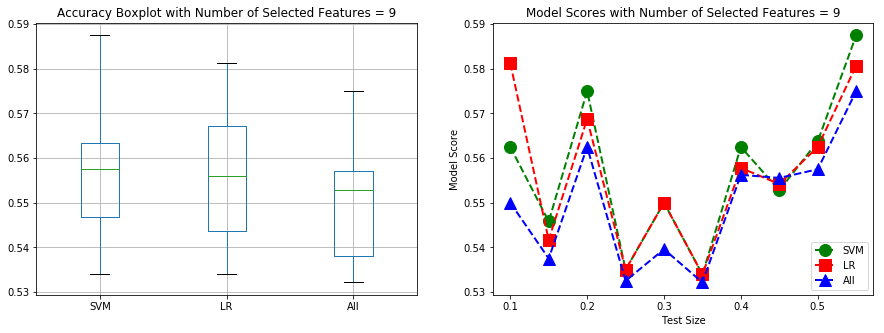

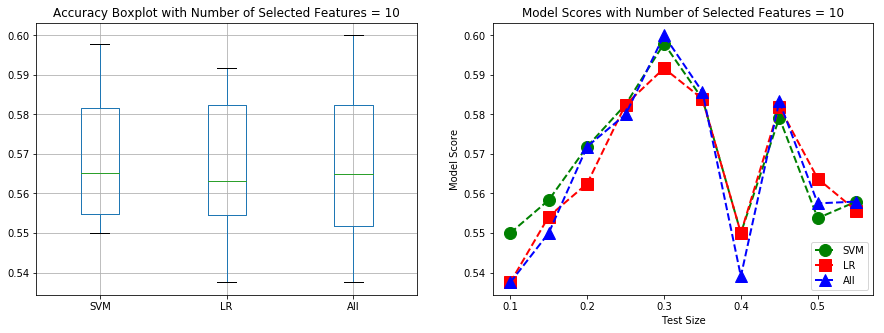

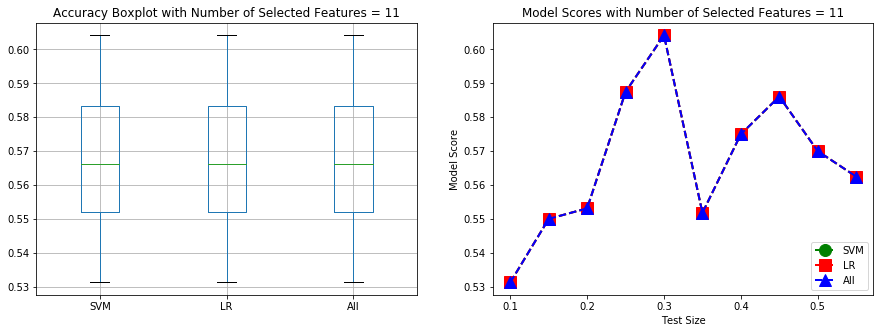

In [186]:

for n in range(len(nfeatures)):
    model1_scores = []
    model2_scores = []
    model3_scores = []
    
    for i in range (len(splits)):
        # pepare independent stratified data sets for training and test of the final model
        predictors_train, predictors_test, target_train, target_test = train_test_split(
            predictors, target, test_size=splits[i], shuffle=True, stratify=target)

        # create a base classifier used to evaluate a subset of attributes
        estimatorSVM = svm.SVR(kernel="linear")
        selectorSVM = RFE(estimatorSVM, nfeatures[n])
        selectorSVM = selectorSVM.fit(predictors_train, target_train)

        # create a base classifier used to evaluate a subset of attributes
        estimatorLR = LogisticRegression(solver='lbfgs', multi_class='auto')
        # create the RFE model and select 3 attributes
        selectorLR = RFE(estimatorLR, nfeatures[n])
        selectorLR = selectorLR.fit(predictors_train, target_train)

        predictors_train_SVMselected = selectorSVM.transform(predictors_train)
        predictors_test_SVMselected = selectorSVM.transform(predictors_test)

        predictors_train_LRselected = selectorLR.transform(predictors_train)
        predictors_test_LRselected = selectorLR.transform(predictors_test)

        classifier = svm.SVC(gamma='auto')

        model1 = classifier.fit(predictors_train_SVMselected, target_train)
        model1_scores.append(model1.score(predictors_test_SVMselected, target_test))

        model2 = classifier.fit(predictors_train_LRselected, target_train)
        model2_scores.append(model2.score(predictors_test_LRselected, target_test))

        model3 = classifier.fit(predictors_train, target_train)
        model3_scores.append(model3.score(predictors_test, target_test))

    # Compare the statistics of the accuracies across all cross-validation folds
    accuracies_df = pd.DataFrame(data={'SVM' : model1_scores, 'LR' : model2_scores, 'All' : model3_scores})

    plt.subplots(1, 2, figsize=(15, 5))
     
    plt.subplot(1,2,1)
    bp = accuracies_df.boxplot()
    plt.title('Accuracy Boxplot with Number of Selected Features = ' + str(nfeatures[n]))
    
    plt.subplot(1,2,2)
    plt.plot(splits, model1_scores, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='SVM')
    plt.plot(splits, model2_scores, color='red', marker='s', linestyle='dashed', linewidth=2, markersize=12, label='LR')
    plt.plot(splits, model3_scores, color='blue', marker='^', linestyle='dashed', linewidth=2, markersize=12, label='All')
    plt.title('Model Scores with Number of Selected Features = ' + str(nfeatures[n]))
    plt.xlabel('Test Size')
    plt.ylabel('Model Score')
    plt.legend(loc="lower right")
    
    plt.show()

In [138]:
print(model1_scores)
print(model2_scores)
print(model3_scores)

[0.55625, 0.553125, 0.5458333333333333, 0.553125, 0.55]
[0.55625, 0.553125, 0.5458333333333333, 0.553125, 0.55]
[0.5875, 0.5625, 0.5583333333333333, 0.565625, 0.5575]


X
X


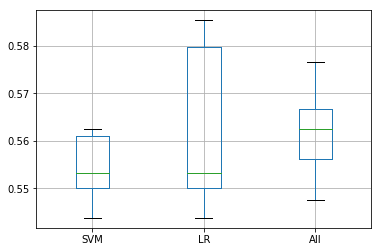

In [162]:
#plt.figure();
bp = accuracies_df.boxplot()
print("X")
#plt.show()

#plt.figure();
bp = accuracies_df.boxplot()
print("X")
#plt.show()